# Gradient_descent
    From Scratch

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


Data source : ADRvsRating .csv
ADR: average damage per round VS Rating

In [28]:
dataset = pd.read_csv("ADRvsRating.csv")
data = dataset.values
N=len(data)



In [29]:
# lets build a function to scatter the point for reusability
# it takes x axis and yaxis element to populate the graph
def my_scatter_func(x,y):
    plt.figure(figsize=(10,5))
    plt.scatter(x,y,color="g",label="ratings")
    plt.title("ADRvs Rating")
    plt.xlabel("ADR")
    plt.ylabel("Rating")
    plt.legend()

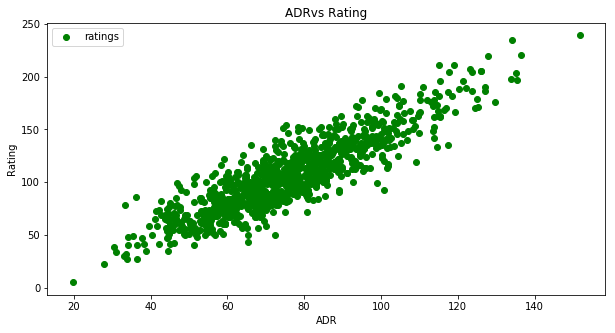

In [30]:
# lets call my_scatter_function to scatter my points
my_scatter_func(data[:,0],data[:,1])
plt.show()

In [31]:
# lets create a error_calculation function to calculate average error 
def error_calculation(m,b,data):
    total_error = 0

    for i in range(N):
        real_output = data[i,1]
        x = data[i,0]
        predicted_output = (m*x+b)
        total_error+=(predicted_output-real_output)**2
    return total_error

    

In [32]:
# lets create a my_plot_func to plot the line for reusability
# here we anly supply x axis element for plot function so we calculate y-axis element inside the function
def my_plot_func(b,m,data):
    plt.plot(data[:,0],m*data[:,0]+b,label="fitting line",color="r")
    plt.legend(loc="best")

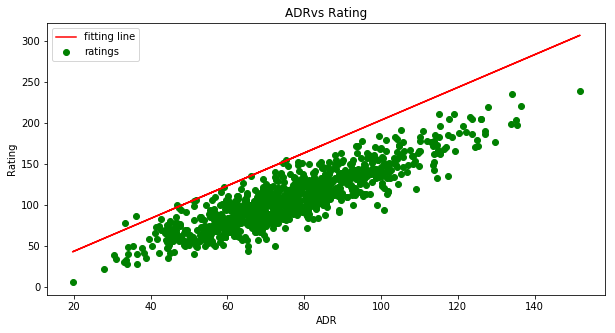

In [33]:
#lets see the linner line fitting with b=2 and m=3
# it seems funny.....HAHAHAHAHAHA
my_scatter_func(data[:,0],data[:,1])
my_plot_func(3,2,data)
plt.show()

In [34]:
#lets compute total error by calling ourpreviously defined error_calculation function 
#to see error for above fitting
error=error_calculation(2,3,data)
error

2644260.8399999994

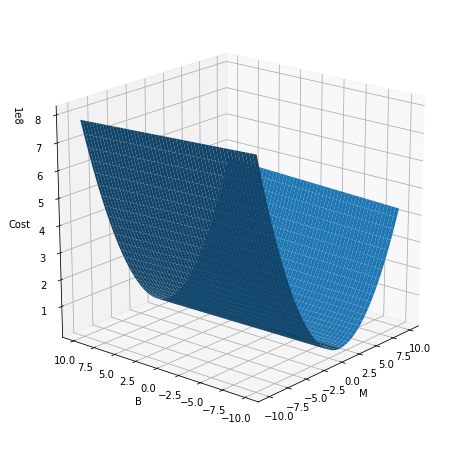

In [28]:
# lets visualize 3D graph of m and b with cost
m=np.arange(-10,10,0.1)
b=np.arange(-10,10,0.1)

fig=plt.figure(figsize=(18,8))
fig1=fig.add_subplot(121,projection="3d")
fig1.view_init(elev=20,azim=220)
x,y=np.meshgrid(m,b)
cost=np.array([error_calculation(m,b,data) for m,b in zip(np.ravel(x),np.ravel(y))])
z=cost.reshape(x.shape)
fig1.plot_surface(x,y,z)
fig1.set_xlabel("M")
fig1.set_ylabel("B")
fig1.set_zlabel("Cost")
plt.show()

In [35]:
def gradient_descent_step(m,b,data):
    
    m_grad = 0
    b_grad = 0
    
    for i in range(N):

        #Get current pair (x,y)
        x = data[i,0]
        y = data[i,1]

        #Update gradient
        m_grad = m_grad + ((2/N)*((m*x+b)-y)*x)
        b_grad = b_grad + ((2/N)*((m*x+b)-y))
    
    #Set the new 'better' updated 'm' and 'b'
    m_updated = m - 0.0001*m_grad
    b_updated = b - 0.0001*b_grad
   
    return m_updated,b_updated

In [36]:
def gradient_descent_step_by_step(m_starting,b_starting,data,steps): #For doing it many times in an easy way 
    print(f'Starting line: y ={m_starting}X + {b_starting} and Error:{error_calculation(m_starting,b_starting,data)}')
    m = m_starting
    b = b_starting
    for i in range(steps):
        m,b = gradient_descent_step(m,b,data)
        if(i % 100 == 0):
            sse = error_calculation(m,b,data)
            print(f'At step {i} - Line: y = {m}X + {b} - Error: {sse}')
    
    
    print(f'At step {i} - Line: y = {m}X + {b} - Error: {sse}')
    return m,b

In [37]:
M_STARTING = 0
B_STARTING = 0
NUM_STEPS = 1000
m,b = gradient_descent_step_by_step(M_STARTING,B_STARTING,data,NUM_STEPS)

Starting line: y =0X + 0 and Error:12515672.0
At step 0 - Line: y = 1.7313251000000012X + 0.021283199999999988 - Error: 882127.4841322359
At step 100 - Line: y = 1.414829036586215X + -0.0010872224518769479 - Error: 268125.41157710884
At step 200 - Line: y = 1.4150574537152718X + -0.019508525723466154 - Error: 268091.4721154656
At step 300 - Line: y = 1.4152856001945937X + -0.03790800173162851 - Error: 268057.61303539627
At step 400 - Line: y = 1.4155134763448713X + -0.05628567633932398 - Error: 268023.83414652804
At step 500 - Line: y = 1.4157410824864158X + -0.07464157537886762 - Error: 267990.1352589366
At step 600 - Line: y = 1.4159684189391584X + -0.09297572465196613 - Error: 267956.51618314855
At step 700 - Line: y = 1.416195486022651X + -0.1112881499297538 - Error: 267922.97673013987
At step 800 - Line: y = 1.4164222840560678X + -0.12957887695282902 - Error: 267889.5167113327
At step 900 - Line: y = 1.416648813358204X + -0.14784793143129019 - Error: 267856.135938597
At step 999 -

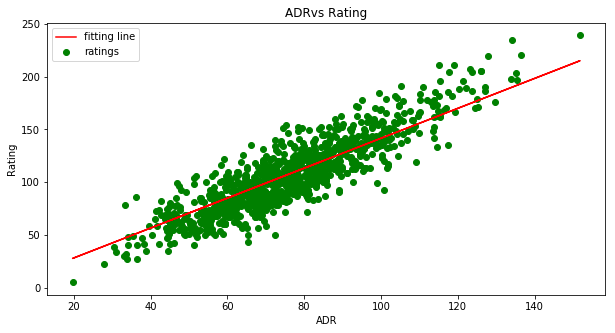

In [38]:
my_scatter_func(data[:,0],data[:,1])
my_plot_func(b,m,data)
plt.show()

In [39]:
f'The obtained line is y={m}X+{b}' 

'The obtained line is y=1.4168728129661836X+-0.16591297203637467'